# Exercício Empírico 02

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.dark_palette("#2EA3C5", reverse=True, n_colors=8))
plt.style.use(['seaborn-paper'])
pd.set_option('display.max_columns', 50)


> A questão de interesse é verificar se maus hábitos (consumo de refrigerante, horas passadas na frente da televisão e quantidade de cigarros fumada) explicam o peso dos indivíduos. Para tanto vocês terão à disposição a base da Pesquisa Nacional de Saúde (PNS) de 2013, elaborada pelo IBGE.
> 
> Todo trabalho empírico, antes de apresentar os resultados econométricos, deve apresentar algumas estatísticas descritivas.
> 
> Assim, você deve inicialmente calcular as estatísticas descritivas (média, desvio-padrão, máximo, mínimo, quantidade), por status de fumante (fumante diário, fumante ocasional e não fumante) para as variáveis que serão utilizadas na primeira regressão múltipla que você vai estimar (equação abaixo):
> 
> $$peso_g = \beta_0 + \beta_1 refrigerante_i + \beta_2 TV_i + \beta_3 cigarro_i + u_i$$
> 
> Em que peso_g é o peso do indivíduo em gramas, TV é a quantidade de horas diárias gastas assistindo televisão e cigarro é a quantidade de cigarros consumida por dia. A variável cigarro assume o valor 0 para os indivíduos que não fumam.
> 
> Comente essas estatísticas descritivas.
> 
> Estime, então, essa regressão. Interprete e comente os resultados.
> 
> Reestime a equação, com a variável dependente em log, assim como a variável cigarro. Interprete os resultados e compare com os obtidos do modelo com as variáveis em nível.
>
> $$log(peso_g) = \beta_0 + \beta_1 refrigerante_i + \beta_2 TV_i + \beta_3 log(cigarro_i) + u_i$$
>
> Que outra variável (variáveis) que faz (fazem) parte da PNS 2013 você poderia adicionar ao modelo? Reestime o modelo incluindo esta variável ou variáveis. Interprete e comente os resultados. A partir daqui você está por conta própria e deve usar seus conhecimentos de Economia e de Econometria.
> 
> O trabalho deve ter 3 páginas e ser entregue no dia 16/06.

***

## Descrição e Tratamento dos Dados

Nesta seção devem ir as informações de:

- Tipos dos dados de forma geral (dados de cross-section, painel, etc) e 'metadados' deles.
- Tipos computacionais dos campos da base.
- Visualização simples da base (`df.head()`).
- Comentários sobre valores únicos e valores faltantes.


Além disso, antes de passarmos para a estimação dos modelos de regressão, é necessário tratar os dados da base. Para isso, seguimos os seguintes passos:

- Remover dados faltantes.
- Normalizar (deixar entre 0 e 1), padronizar ou aplicar $logs$ nos dados contínuos. Esse passo depende diretamente do que será feito na etapa de estimação, nem todos os modelos dependem desse tratamento.

***


In [2]:
df = pd.read_stata('dados/dados_ex_empirico_2.dta')
df.head()

,v0001,c006,c00701,c00702,c00703,c008,c009,c010,c011,d001,p020,p022,p045,p050,p05402,w00103,w00203,v0022
0,11,1,29,12,1977,35,2,1.0,1.0,2.0,3.0,2.0,3.0,3.0,NaN,59.500000,162.0,4
1,11,2,0,20,37,37,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,11,2,18,1,2013,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,11,2,0,20,16,16,1,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,11,1,7,11,1970,42,4,1.0,1.0,1.0,4.0,2.0,3.0,3.0,NaN,81.199997,169.0,2


In [3]:
cod = list(df.columns)

trad = ['Estado da Federação', 'Sexo', 'Dia de Nascimento ', 'Mês de Nascimento', 'Ano de Nascimento', 'Idade', 'Cor ou Raça', 
    'Vive Acompanhado', 'Estado Civil', 'Alfabetizado', 'Quantidade de Dias que Consome Refrigerante', 
    'Quantidade de Refrigerante Consumida', 'Horas assistindo TV', 'Fumante', 'Quantidad de Cigarro/Dia', 'Peso (kg)',
    'Altura (cm)', '']

dicio = pd.DataFrame({'Código': cod, 'Significado': trad})
display(dicio)

# df = df_og.__deepcopy__()
# df.columns = trad_2
# display(df.head())
# display(pd.DataFrame({'Código': cod, 'Significado': trad_2}))

,Código,Significado
0,v0001,Estado da Federação
1,c006,Sexo
2,c00701,Dia de Nascimento
3,c00702,Mês de Nascimento
4,c00703,Ano de Nascimento
5,c008,Idade
6,c009,Cor ou Raça
7,c010,Vive Acompanhado
8,c011,Estado Civil
9,d001,Alfabetizado


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205546 entries, 0 to 205545
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   v0001   205546 non-null  int8   
 1   c006    205546 non-null  int8   
 2   c00701  205546 non-null  int8   
 3   c00702  205546 non-null  int8   
 4   c00703  205546 non-null  int16  
 5   c008    205546 non-null  int16  
 6   c009    205546 non-null  int8   
 7   c010    175214 non-null  float64
 8   c011    175214 non-null  float64
 9   d001    191097 non-null  float64
 10  p020    60202 non-null   float64
 11  p022    41462 non-null   float64
 12  p045    60202 non-null   float64
 13  p050    60202 non-null   float64
 14  p05402  6110 non-null    float64
 15  w00103  59402 non-null   float32
 16  w00203  59402 non-null   float32
 17  v0022   205546 non-null  int8   
dtypes: float32(2), float64(8), int16(2), int8(6)
memory usage: 17.6 MB


### Mudando Unidades

***

In [5]:
# Transformando de quilograma para gramas, conforme o enunciado pede

df['w00103og'] = df['w00103'].__deepcopy__()
df['w00103'] = df['w00103'] * 1000

### Tratando Variáveis Categóricas

***

In [6]:
# https://stackoverflow.com/questions/64671316/convert-numerical-data-to-categorical-in-python
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans

d_p050 = {1: 'diariamente', 2: 'menos que diariamente', 3: 'não fumo atualmente'}  
df['p050'] = df['p050'].map(d_p050).fillna(df['p050'])

d_c006 = {1: 'masculino', 2: 'feminino'}
df['c006'] = df['c006'].map(d_c006).fillna(df['c006'])

d_c009 = {1: 'branca', 2: 'preta', 3: 'amarela', 4: 'parda', 5: 'indigena', 9: 'ignorado'}
df['c009'] = df['c009'].map(d_c009).fillna(df['c009'])

d_c010 = {1: 'vive acompanhado', 2: 'nao vive acompanhado'}
df['c010'] = df['c010'].map(d_c010).fillna(df['c010'])

d_c011 = {1: 'casado(a)', 2: 'separado(a) ou desquitado(a) judicialmente', 3: 'divorciado(a)', 4: 'viuvo(a)', 5: 'solteiro(a)'}
df['c011'] = df['c011'].map(d_c011).fillna('nao aplicavel')

d_d001 = {1: 'alfabetizado', 2: 'nao alfabetizado'}
df['d001'] = df['d001'].map(d_d001).fillna('nao aplicavel')

d_p045 = {1: 0.5, 2: 1.5, 3: 2.5, 4: 3.5, 5: 4.5, 6: 5.5, 7: 6.5, 8: 0}
df['p045'] = df['p045'].map(d_p045).fillna(0)

# d_p022 = {1: '1 copo', 2: '2 copos', 3: '3 copos ou mais'}
# df['p022'] = df['p022'].map(d_p022).fillna('nao aplicavel')

df.head()

,v0001,c006,c00701,c00702,c00703,c008,c009,c010,c011,d001,p020,p022,p045,p050,p05402,w00103,w00203,v0022,w00103og
0,11,masculino,29,12,1977,35,preta,vive acompanhado,casado(a),nao alfabetizado,3.0,2.0,2.5,não fumo atualmente,NaN,59500.0,162.0,4,59.500000
1,11,feminino,0,20,37,37,branca,vive acompanhado,casado(a),alfabetizado,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4,NaN
2,11,feminino,18,1,2013,0,parda,NaN,nao aplicavel,nao aplicavel,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4,NaN
3,11,feminino,0,20,16,16,branca,nao vive acompanhado,solteiro(a),alfabetizado,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4,NaN
4,11,masculino,7,11,1970,42,parda,vive acompanhado,casado(a),alfabetizado,4.0,2.0,2.5,não fumo atualmente,NaN,81200.0,169.0,2,81.199997


### Tratando Missing Values

***

In [7]:
df = df.fillna(value={'p020': 0, 'p022': 0, 'p05402': 0})
df.head()

,v0001,c006,c00701,c00702,c00703,c008,c009,c010,c011,d001,p020,p022,p045,p050,p05402,w00103,w00203,v0022,w00103og
0,11,masculino,29,12,1977,35,preta,vive acompanhado,casado(a),nao alfabetizado,3.0,2.0,2.5,não fumo atualmente,0.0,59500.0,162.0,4,59.500000
1,11,feminino,0,20,37,37,branca,vive acompanhado,casado(a),alfabetizado,0.0,0.0,0.0,NaN,0.0,NaN,NaN,4,NaN
2,11,feminino,18,1,2013,0,parda,NaN,nao aplicavel,nao aplicavel,0.0,0.0,0.0,NaN,0.0,NaN,NaN,4,NaN
3,11,feminino,0,20,16,16,branca,nao vive acompanhado,solteiro(a),alfabetizado,0.0,0.0,0.0,NaN,0.0,NaN,NaN,4,NaN
4,11,masculino,7,11,1970,42,parda,vive acompanhado,casado(a),alfabetizado,4.0,2.0,2.5,não fumo atualmente,0.0,81200.0,169.0,2,81.199997


***

## Análise Exploratória

Nesta seção olhamos as características básicas da nossa base de dados. Tais como:

- Medidas de tendência central, como ***médias (aritimética, ponderada, harmônica e geométrica), mediana e moda***.
- Medidas de dispersão, como ***range, variância, desvio e desvio-padrão***.
- Comentários sobre a ***distribuição*** dos valores das variáveis.
- Medidas de associação entre variáveis, como a ***correlação*** e seus diferentes tipos.
- Aqui também é útil fazer uso intensivo de gráficos. Alguns exemplos dos que podem ser utilizados são:
  - Histogramas
  - Gráficos de barras/linhas/pizza
  - Boxplots
  - Gráficos de dispersão
  - Pair plots
  - Heatmaps, etc

In [8]:
# Fazer gráfico tendo em mente as proporções

# Quebra de informações a partir da frequência de fumo
    # Idade
    # Consumo de refrigerante
    # Sexo e Raça
    # Quantidade de horas assistindo TV
    # Estado Civil e Vive Acompanhado

In [9]:
df.drop(['c00701', 'c00702', 'c00703', 'v0001'], axis=1).describe().round(2)

,c008,p020,p022,p045,p05402,w00103,w00203,v0022,w00103og
count,205546.00,205546.00,205546.00,205546.00,205546.00,59402.00,59402.00,205546.00,59402.00
mean,32.28,0.69,0.35,0.69,0.38,70403.97,163.04,4.03,70.40
std,20.65,1.70,0.76,1.41,2.78,15215.30,9.74,1.88,15.22
min,0.00,0.00,0.00,0.00,0.00,30000.00,125.00,1.00,30.00
25%,15.00,0.00,0.00,0.00,0.00,59700.00,156.00,3.00,59.70
50%,30.00,0.00,0.00,0.00,0.00,68600.00,162.80,4.00,68.60
75%,47.00,0.00,0.00,0.50,0.00,79200.00,170.00,5.00,79.20
max,109.00,7.00,3.00,6.50,80.00,179000.00,203.00,22.00,179.00


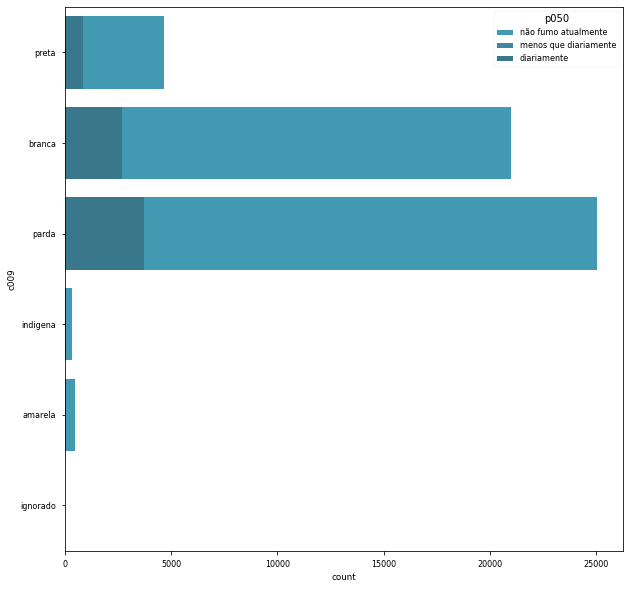

In [10]:
fig, ax =plt.subplots(figsize=(10, 10))

sns.countplot(y='c009', data=df, hue='p050', dodge=False)

plt.show()

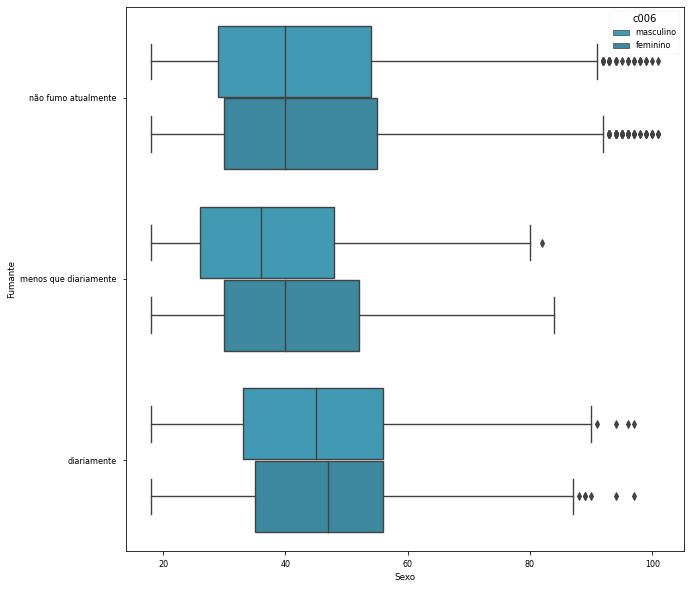

In [11]:
fig, ax =plt.subplots(figsize=(10, 10))

sns.boxplot(y='p050', x='c008', hue='c006', data=df, orient='h', ax=ax)

plt.xlabel('Sexo')
plt.ylabel('Fumante')
# plt.legend(title='Sexo', loc='upper right', labels=['masculino', 'feminino'])

plt.show()

In [12]:
# idade com retornos decrescentes
# transformar estado civil em dummy
# iteração entre vive acompanhado e estado civil (pode nao ser casado, mas se vive acompanhado a dinamica eh a mesma quase)
# iteração entre p020 e p022 para mostrar o consumo total de refrigerante

***

## Modelos de Regressão

***

### Modelo 01

***

$$peso_g = \beta_0 + \beta_1 refrigerante_i + \beta_2 TV_i + \beta_3 cigarro_i + u_i$$

In [13]:
df_reg1 = df[['w00103', 'p020', 'p045', 'p05402']].__deepcopy__()

X = df_reg1[['p020', 'p045', 'p05402']]
X = sm.add_constant(X)

Y = df_reg1['w00103']

model_01 = sm.OLS(Y, X, missing='drop')
results_01 = model_01.fit()
print(results_01.summary())

                            OLS Regression Results                            
Dep. Variable:                 w00103   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     91.56
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           4.08e-59
Time:                        08:53:37   Log-Likelihood:            -6.5619e+05
No. Observations:               59402   AIC:                         1.312e+06
Df Residuals:                   59398   BIC:                         1.312e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.898e+04    120.429    572.791      0.0

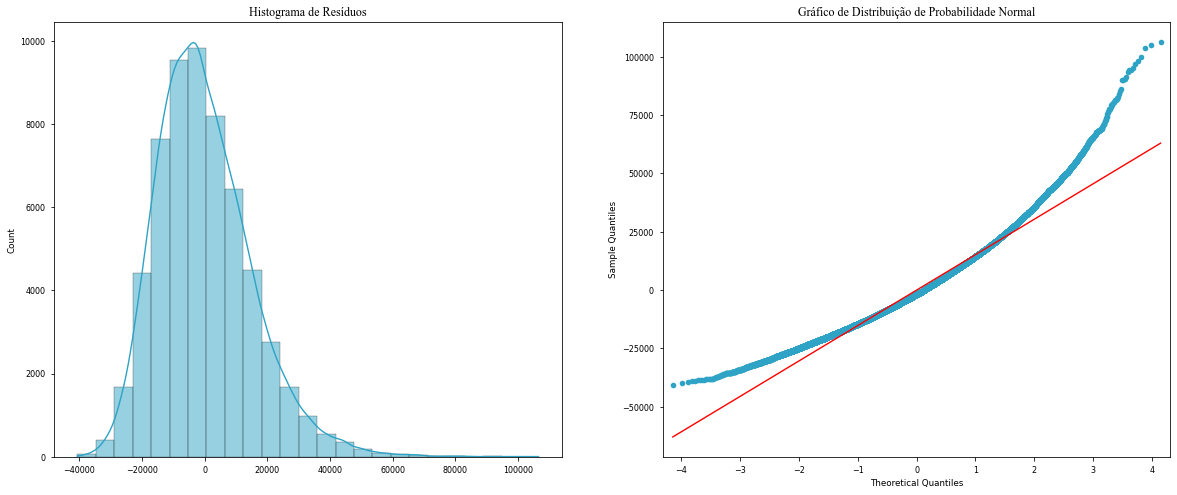

In [14]:
# https://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots
# https://matplotlib.org/3.5.0/tutorials/text/annotations.html
# https://matplotlib.org/3.5.0/tutorials/text/text_intro.html

# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots -> Escrever a sua resposta

u_1 = results_01.resid

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Histograma de Residuos 
sns.histplot(x=u_1, bins=25, kde=True, ax=axes[0])
axes[0].set_title('Histograma de Resíduos', {'fontname':'Times New Roman', 'fontsize': 12})

# Grafico de Distribuição de Probabilidade Normal
import statsmodels.graphics.gofplots as gm
pnorm = gm.ProbPlot(u_1).qqplot(line='s', ax=axes[1])
axes[1].set_title('Gráfico de Distribuição de Probabilidade Normal', {'fontname':'Times New Roman', 'fontsize': 12})


plt.show()

O resultado da regressão acima nos diz que existe uma associação positiva entre o peso em gramas do indivíduo, a quantidade de dias que ele consome refrigerante ($\text{p020}$) e a quantidade de horas assistindo televisão. Isto é, *ceteris paribus*, consumir refrigerante um dia a mais na semana pode levar a um aumento do peso do indivíduo em cerca de 380 gramas, essa análise de estática comparativa pode ser extrapolada para as outras variáveis do modelo para demonstrar que uma hora a mais assistindo TV ($\text{p045}$) está associada a um ganho de 227 gramas e que o consumo de um cigarro a mais ($\text{p05402}$) está associado a uma diminuição de 9 gramas no peso do indivíduo. Segundo a tabela de resumo, o $R^2$ de $0.005$ indica que a regressão explica 0,5% da variação do peso do indivíduo em gramas. Dada a simplicidade do modelo inicial, é compreensível esse baixo poder explicativo.

Adicionalmente, para testarmos a hipótese de que cada parâmetro individual é igual a zero, isto é, $\beta_i = 0$, nós precisamos garantir que os resíduos do nosso modelo são distribuídos normalmente. É possível ver através das ferramentas gráficas acima que a distribuição do termo de erro do nosso modelo não se aproxima perfeitamente de uma distribuição normal, mas, apesar disso, prosseguiremos com o teste de hipóteses.

Os valores estimados para os nossos $\hat{\beta_i}$ são, respectivamente, $382.0815$, $227.6570$ e $-9.2446$. Através dos p-valores informados no tabela de resumo, podemos rejeitar a hipótese nula para os dois primeiros coeficientes ($\beta_1 \ne 0$ e $\beta_2 \ne 0$), mas não para o terceiro ($\beta_3$). Em suma, os resultados da nossa regressão são estatisticamente significantes ao nível de 5% para os dois primeiros coeficientes, mas não para o terceiro. Além disso, o p-valor da estatística $F$ nos mostra que os coeficientes da regressão, de forma conjunta, são estatisticamente significantes ao nível de 5%.

### Modelo 02

***

$$log(peso_g) = \beta_0 + \beta_1 refrigerante_i + \beta_2 TV_i + \beta_3 log(cigarro_i) + u_i$$

In [15]:
df_reg2 = df[['w00103', 'p020', 'p045', 'p05402']].__deepcopy__()

df_reg2['log_p05402'] = np.log(df_reg2['p05402'] + 1)
df_reg2['log_w00103'] = np.log(df_reg2['w00103'] + 1)


X = df_reg2[['p020', 'p045', 'log_p05402']]
X = sm.add_constant(X)

Y = df_reg2['log_w00103']

model_02 = sm.OLS(Y, X, missing='drop')
results_02 = model_02.fit()
print(results_02.summary())

                            OLS Regression Results                            
Dep. Variable:             log_w00103   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     86.61
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           6.52e-56
Time:                        08:53:38   Log-Likelihood:                 8194.7
No. Observations:               59402   AIC:                        -1.638e+04
Df Residuals:                   59398   BIC:                        -1.635e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1216      0.002   6636.866      0.0

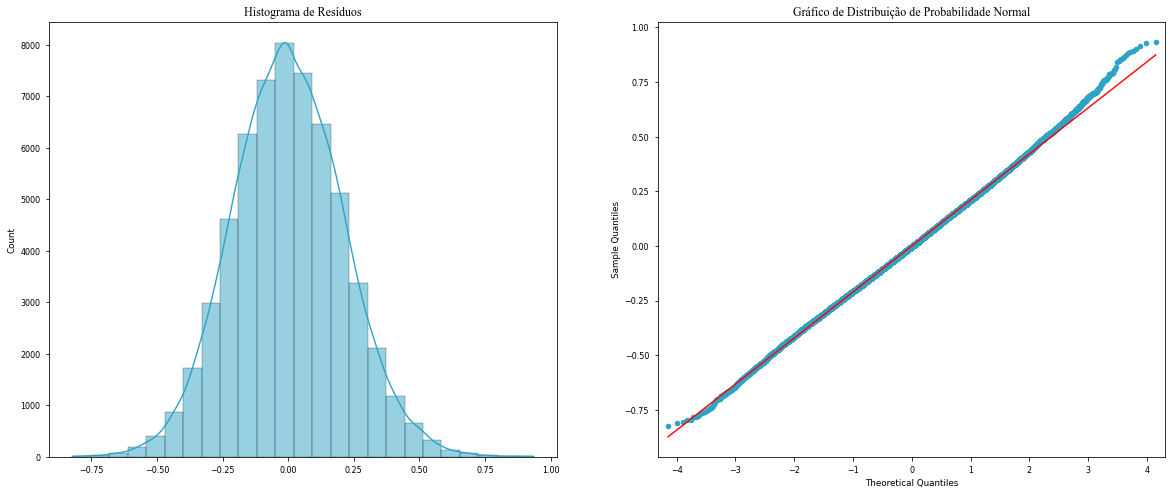

In [16]:
u_2 = results_02.resid

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Histograma de Residuos 
sns.histplot(x=u_2, bins=25, kde=True, ax=axes[0])
axes[0].set_title('Histograma de Resíduos', {'fontname':'Times New Roman', 'fontsize': 12})

# Grafico de Distribuição de Probabilidade Normal

import statsmodels.graphics.gofplots as gm
pnorm = gm.ProbPlot(u_2).qqplot(line='s', ax=axes[1])
axes[1].set_title('Gráfico de Distribuição de Probabilidade Normal', {'fontname':'Times New Roman', 'fontsize': 12})

plt.show()

Neste segundo modelo, 


O resultado da regressão acima nos diz que existe uma associação positiva entre o peso em gramas do indivíduo, a quantidade de dias que ele consome refrigerante ($\text{p020}$) e a quantidade de horas assistindo televisão. Isto é, *ceteris paribus*, consumir refrigerante um dia a mais na semana pode levar a um aumento do peso do indivíduo em cerca de 380 gramas, essa análise de estática comparativa pode ser extrapolada para as outras variáveis do modelo para demonstrar que uma hora a mais assistindo TV ($\text{p045}$) está associada a um ganho de 227 gramas e que o consumo de um cigarro a mais ($\text{p05402}$) está associado a uma diminuição de 9 gramas no peso do indivíduo. Segundo a tabela de resumo, o $R^2$ de $0.005$ indica que a regressão explica 0,5% da variação do peso do indivíduo em gramas. Dada a simplicidade do modelo inicial, é compreensível esse baixo poder explicativo.

Adicionalmente, para testarmos a hipótese de que cada parâmetro individual é igual a zero, isto é, $\beta_i = 0$, nós precisamos garantir que os resíduos do nosso modelo são distribuídos normalmente. É possível ver através das ferramentas gráficas acima que a distribuição do termo de erro do nosso modelo não se aproxima perfeitamente de uma distribuição normal, mas, apesar disso, prosseguiremos com o teste de hipóteses.

Os valores estimados para os nossos $\hat{\beta_i}$ são, respectivamente, $382.0815$, $227.6570$ e $-9.2446$. Através dos p-valores informados na tabela de resumo, podemos rejeitar a hipótese nula para os dois primeiros coeficientes ($\beta_1 \ne 0$ e $\beta_2 \ne 0$), mas não para o terceiro ($\beta_3$). Em suma, os resultados da nossa regressão são estatisticamente significantes ao nível de 5% para os dois primeiros coeficientes, mas não para o terceiro. Além disso, o p-valor da estatística $F$ nos mostra que os coeficientes da regressão, de forma conjunta, são estatisticamente significantes ao nível de 5%.

### Modelo 03

***

- Interação entre p020 e p022 para mostrar o consumo total de refrigerante


</br>

$$log(\text{peso}) = \beta_0 + \beta_1 \text{idade}_i + \beta_2 \text{idade}^2 + \beta_3 (\text{p020} \times \text{p022}) + \beta_4 \text{TV}_i + \beta_5 log(\text{cigarro}_i) + \beta_6 \text{altura}_i + u_i$$

In [17]:
df_reg3 = df[['w00103', 'c008', 'p020', 'p022', 'p045', 'p05402', 'w00203']].__deepcopy__()

df_reg3['log_p05402'] = np.log(df_reg3['p05402'] + 1)
df_reg3['log_w00103'] = np.log(df_reg3['w00103'] + 1)
df_reg3['p020_p022'] = df_reg3['p020'] * df_reg3['p022']
df_reg3['c008_2'] = df_reg3['c008'] ** 2

X = df_reg3[['c008', 'c008_2', 'p020_p022', 'p045', 'log_p05402', 'w00203']]
X = sm.add_constant(X)

Y = df_reg3['log_w00103']

model_03 = sm.OLS(Y, X, missing='drop')
results_03 = model_03.fit()
print(results_03.summary())


                            OLS Regression Results                            
Dep. Variable:             log_w00103   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     4138.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:53:39   Log-Likelihood:                 18439.
No. Observations:               59402   AIC:                        -3.686e+04
Df Residuals:                   59395   BIC:                        -3.680e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9629      0.014    635.219      0.0

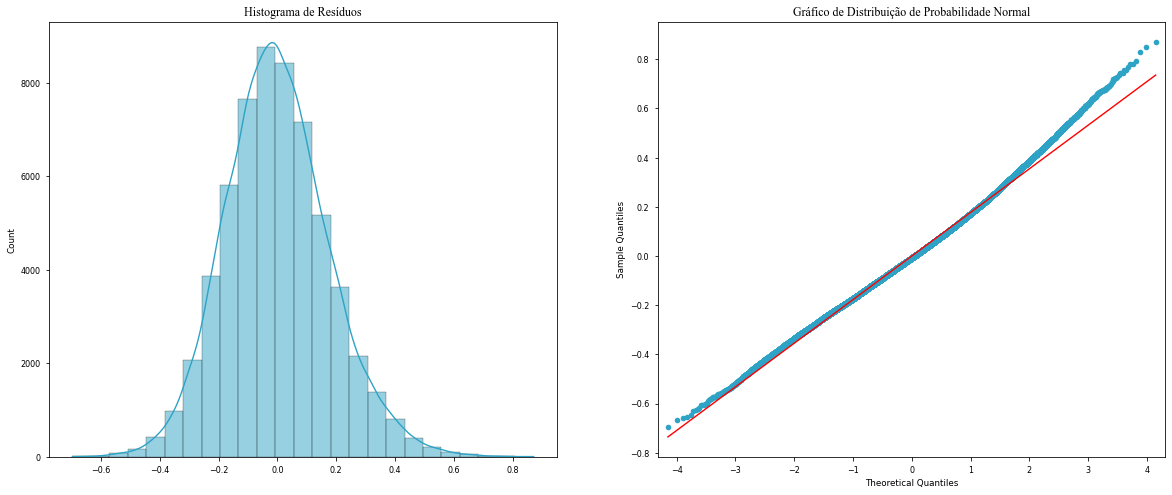

In [18]:
u_3 = results_03.resid

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Histograma de Residuos 
sns.histplot(x=u_3, bins=25, kde=True, ax=axes[0])
axes[0].set_title('Histograma de Resíduos', {'fontname':'Times New Roman', 'fontsize': 12})

# Grafico de Distribuição de Probabilidade Normal

import statsmodels.graphics.gofplots as gm
pnorm = gm.ProbPlot(u_3).qqplot(line='s', ax=axes[1])
axes[1].set_title('Gráfico de Distribuição de Probabilidade Normal', {'fontname':'Times New Roman', 'fontsize': 12})

plt.show()

In [19]:
# idade com retornos decrescentes
# transformar estado civil em dummy
# iteração entre vive acompanhado e estado civil (pode nao ser casado, mas se vive acompanhado a dinamica eh a mesma quase)
# iteração entre p020 e p022 para mostrar o consumo total de refrigerante